In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from minepy import MINE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_california_housing
#from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv('../../data/tidy/data-aggregation.csv', index_col=[0])

In [3]:
df.head()

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,fueloil_gal,vmt,hh_2014,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh,cf_phh,cf
msa,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,1.336685,76234.634771,65492.0,15.927517,12.674110,7.667713,4.616458,5.004892,49.144098,3.218545e+06
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,79.046948,47008.858596,160668.0,15.993913,11.746599,7.517472,5.391050,6.071775,50.968122,8.188946e+06
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,9.162196,72787.504018,57134.0,14.360085,13.990202,7.972296,4.684970,5.050888,46.428323,2.652636e+06
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,1181.335835,103020.435963,392206.0,14.195390,10.778376,7.221763,5.349727,6.058857,47.021127,1.844197e+07
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,4.024810,101942.760602,305713.0,15.594705,13.531895,7.775563,5.051710,5.576700,49.593381,1.516134e+07


In [4]:
for column in df.columns:
    print(column)

households
med_hh_inc_dol
ms_cara
ms_carp
ms_pt
ms_taxi
ms_bike
ms_walk
ms_wfh
unemp
auto_commuters
annual_excess_fuel_consumed_commuters
ahd
tti
dvmt_freeway
ahd_truck
vmt_arterial
n
m
k_avg
edge_length_total
edge_length_avg
streets_per_node_avg
intersection_count
street_length_total
street_segment_count
street_length_avg
circuity_avg
self_loop_proportion
node_density_km
intersection_density_km
edge_density_km
street_density_km
builing_area_sqkm
area_sqkm
pop_2014
electricity_kwh
nat_gas_cuft
fueloil_gal
vmt
hh_2014
cf_transport_phh
cf_housing_phh
cf_food_phh
cf_goods_phh
cf_services_phh
cf_phh
cf


In [5]:
y = df['cf']

In [6]:
cols_to_plot = df.iloc[:, :-1]

In [7]:
cols_to_plot2 = df.iloc[:, :-3]

In [8]:
list(cols_to_plot)

['households',
 'med_hh_inc_dol',
 'ms_cara',
 'ms_carp',
 'ms_pt',
 'ms_taxi',
 'ms_bike',
 'ms_walk',
 'ms_wfh',
 'unemp',
 'auto_commuters',
 'annual_excess_fuel_consumed_commuters',
 'ahd',
 'tti',
 'dvmt_freeway',
 'ahd_truck',
 'vmt_arterial',
 'n',
 'm',
 'k_avg',
 'edge_length_total',
 'edge_length_avg',
 'streets_per_node_avg',
 'intersection_count',
 'street_length_total',
 'street_segment_count',
 'street_length_avg',
 'circuity_avg',
 'self_loop_proportion',
 'node_density_km',
 'intersection_density_km',
 'edge_density_km',
 'street_density_km',
 'builing_area_sqkm',
 'area_sqkm',
 'pop_2014',
 'electricity_kwh',
 'nat_gas_cuft',
 'fueloil_gal',
 'vmt',
 'hh_2014',
 'cf_transport_phh',
 'cf_housing_phh',
 'cf_food_phh',
 'cf_goods_phh',
 'cf_services_phh',
 'cf_phh']

In [9]:
len(cols_to_plot.columns)

47

In [10]:
#grid = sns.FacetGrid(df, col='cf', col_wrap=3)

In [12]:
xa = df['hh_2014']
ya = df['cf']
#g = sns.regplot(xa, ya, ci=None)

In [13]:
X = df['hh_2014'].values

In [14]:
Y = df['cf'].values

In [15]:
X = sm.add_constant(X, prepend=True)

In [16]:
lm = sm.OLS(Y,X)

In [17]:
result = lm.fit()

In [18]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.846e+04
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:27:41   Log-Likelihood:                -5452.0
No. Observations:                 335   AIC:                         1.091e+04
Df Residuals:                     333   BIC:                         1.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.864e+04   1.69e+05      0.464      0.6

In [19]:
for column in cols_to_plot.columns:
    #grid.map(sns.scatterplot, x, y)
    x = df[column]
    fig = plt.figure(figsize=(8,8))
    plt.scatter(x, y)
    #grid.set_axis_labels(column, 'Total Carbon Footprint (tCO2/yr')
    #grid.set_titles('Total Carbon Footprint vs ' + column)
    plt.xlabel(column)
    plt.ylabel('Total Carbon Footprint (tCO2/yr)')
    plt.title('Total Carbon Footprint vs ' + column)
    plt.savefig('../../figures/' + column + '.png', dpi=300, facecolor='white')
    plt.close(fig)

50.38144102800955

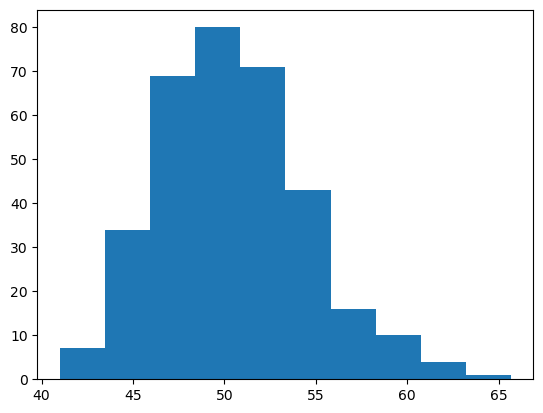

In [20]:
plt.hist(df['cf_phh'])
df['cf_phh'].mean()

(array([307.,  15.,   5.,   2.,   3.,   1.,   1.,   0.,   0.,   1.]),
 array([   6815. ,  636707.4, 1266599.8, 1896492.2, 2526384.6, 3156277. ,
        3786169.4, 4416061.8, 5045954.2, 5675846.6, 6305739. ]),
 <BarContainer object of 10 artists>)

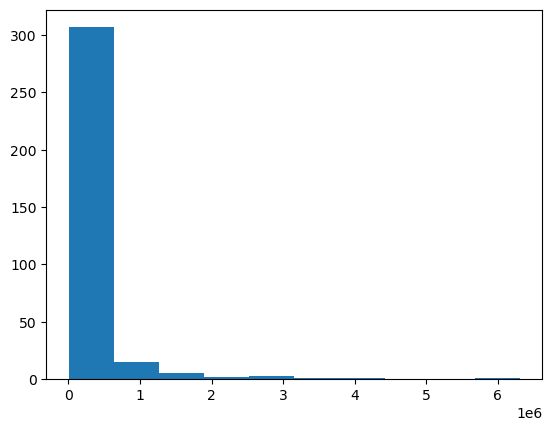

In [21]:
plt.hist(df['hh_2014'])

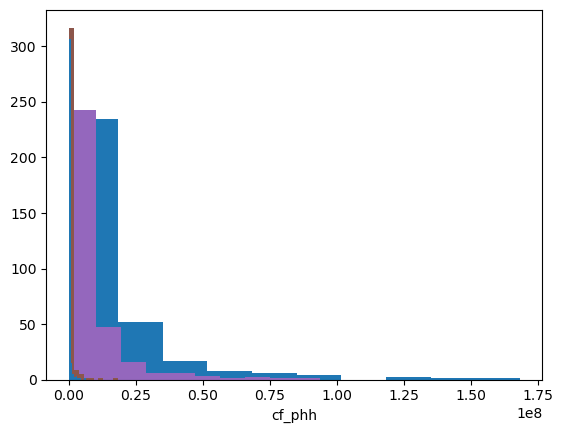

In [22]:
for column in cols_to_plot.columns:
    x = df[column]
    plt.hist(x)
    plt.xlabel(column)
    plt.show

In [23]:
X = cols_to_plot2

In [24]:
X = X.fillna(value=-999)

In [25]:
X.head()

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,pop_2014,electricity_kwh,nat_gas_cuft,fueloil_gal,vmt,hh_2014,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh
msa,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,160828.0,35714.088774,98701.118579,1.336685,76234.634771,65492.0,15.927517,12.674110,7.667713,4.616458
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,678301.0,23257.037633,121455.109113,79.046948,47008.858596,160668.0,15.993913,11.746599,7.517472,5.391050
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,141811.0,38975.470766,85814.672587,9.162196,72787.504018,57134.0,14.360085,13.990202,7.972296,4.684970
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,820825.0,36802.454287,233221.913105,1181.335835,103020.435963,392206.0,14.195390,10.778376,7.221763,5.349727
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,729083.0,49890.513214,147251.735865,4.024810,101942.760602,305713.0,15.594705,13.531895,7.775563,5.051710


In [26]:
rf = RandomForestRegressor(max_features=7, n_estimators=100, random_state=0)

In [27]:
Y = df['cf']/1e+6

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 1)

In [29]:
y_train

msa
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD    148.362999
Muskegon, MI                                     3.494325
Owensboro, KY                                    2.411588
Texarkana, TX-AR                                 2.881796
Knoxville, TN                                   16.278935
                                                  ...    
Missoula, MT                                     2.039216
Richmond, VA                                    35.644579
Corvallis, OR                                    1.491116
Parkersburg-Vienna, WV                           1.994208
Bowling Green, KY                                2.824641
Name: cf, Length: 268, dtype: float64

In [30]:
X_train

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,pop_2014,electricity_kwh,nat_gas_cuft,fueloil_gal,vmt,hh_2014,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh
msa,,,,,,,,,,,,,,,,,,,,,
"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2229039,62169,0.734070,0.078420,0.095832,0.007934,0.006113,0.037253,0.040378,9.9,...,5671537.0,121876.560971,557802.410089,2423.594803,245378.321521,3048618.0,14.219211,14.745603,7.799982,5.818594
"Muskegon, MI",64889,41842,0.843075,0.094618,0.003720,0.007200,0.003929,0.011846,0.035612,14.1,...,172082.0,11288.712313,71846.001630,17.204065,23720.036802,69428.0,16.075221,18.152258,7.812469,4.942613
"Owensboro, KY",45111,45639,0.865106,0.079089,0.003827,0.006111,0.001623,0.022342,0.021901,6.8,...,111620.0,45922.796650,123271.583378,9.045942,80455.334682,47131.0,16.806894,17.335524,7.463345,4.803580
"Texarkana, TX-AR",55953,41818,0.849894,0.105848,0.003820,0.014770,0.000917,0.009354,0.015398,8.6,...,143104.0,39572.105762,100952.525760,1.546589,67679.127891,60508.0,15.337808,13.714619,7.502420,4.532922
"Knoxville, TN",340980,44906,0.851397,0.086521,0.005567,0.006998,0.001450,0.011888,0.036180,8.2,...,722306.0,102067.410326,266293.324554,131.670681,204120.145662,323030.0,16.502112,14.747421,7.175990,4.838895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Missoula, MT",45961,47029,0.719383,0.103453,0.018698,0.008915,0.039754,0.053401,0.056396,9.1,...,93387.0,8683.432792,57081.624176,8.011961,24849.632336,40326.0,16.717966,10.618058,7.229643,4.708866
"Richmond, VA",463593,59677,0.818281,0.090311,0.016715,0.010070,0.004441,0.015366,0.044816,8.2,...,742918.0,169595.138634,363246.107579,2040.560329,403675.442990,602748.0,19.193723,14.497552,7.715848,6.071521
"Corvallis, OR",33376,49338,0.642487,0.082615,0.024110,0.009842,0.080584,0.086052,0.074309,8.7,...,72682.0,9977.354419,34434.262328,11.456847,23215.181448,30180.0,15.880163,9.841113,7.155732,4.955155


In [31]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=7, random_state=0)

In [32]:
y_pred = rf.predict(X_test)

(0.0, 150.0)

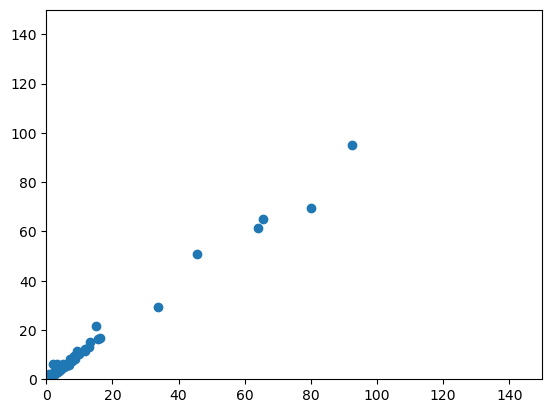

In [33]:
plt.scatter(y_test, y_pred)
plt.ylim(0, 150)
plt.xlim(0, 150)

In [34]:
mean_absolute_percentage_error(y_test, y_pred)

0.15503748655315025

In [35]:
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
tree_importances = pd.Series(result.importances_mean, index=X.columns)

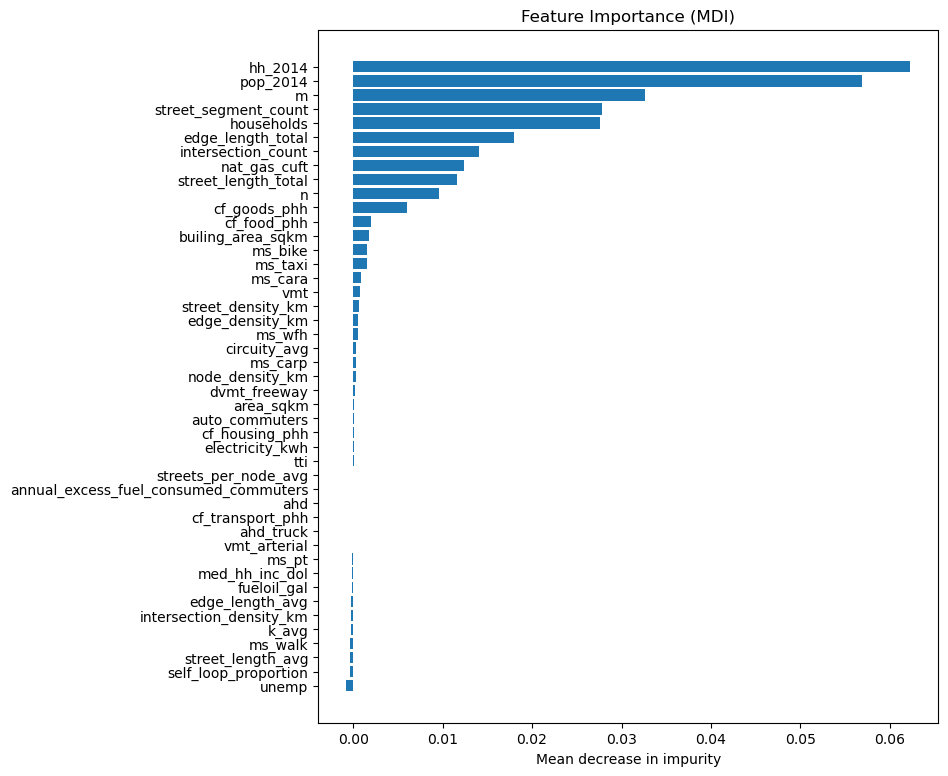

In [36]:
# sort features according to importance
sorted_idx = np.argsort(tree_importances)
pos = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(8,9))
# plot feature importances
plt.barh(pos, tree_importances[sorted_idx], align="center")

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

In [37]:
X.columns

Index(['households', 'med_hh_inc_dol', 'ms_cara', 'ms_carp', 'ms_pt',
       'ms_taxi', 'ms_bike', 'ms_walk', 'ms_wfh', 'unemp', 'auto_commuters',
       'annual_excess_fuel_consumed_commuters', 'ahd', 'tti', 'dvmt_freeway',
       'ahd_truck', 'vmt_arterial', 'n', 'm', 'k_avg', 'edge_length_total',
       'edge_length_avg', 'streets_per_node_avg', 'intersection_count',
       'street_length_total', 'street_segment_count', 'street_length_avg',
       'circuity_avg', 'self_loop_proportion', 'node_density_km',
       'intersection_density_km', 'edge_density_km', 'street_density_km',
       'builing_area_sqkm', 'area_sqkm', 'pop_2014', 'electricity_kwh',
       'nat_gas_cuft', 'fueloil_gal', 'vmt', 'hh_2014', 'cf_transport_phh',
       'cf_housing_phh', 'cf_food_phh', 'cf_goods_phh'],
      dtype='object')

Text(0.5, 1.0, 'Permutation Importance (test set)')

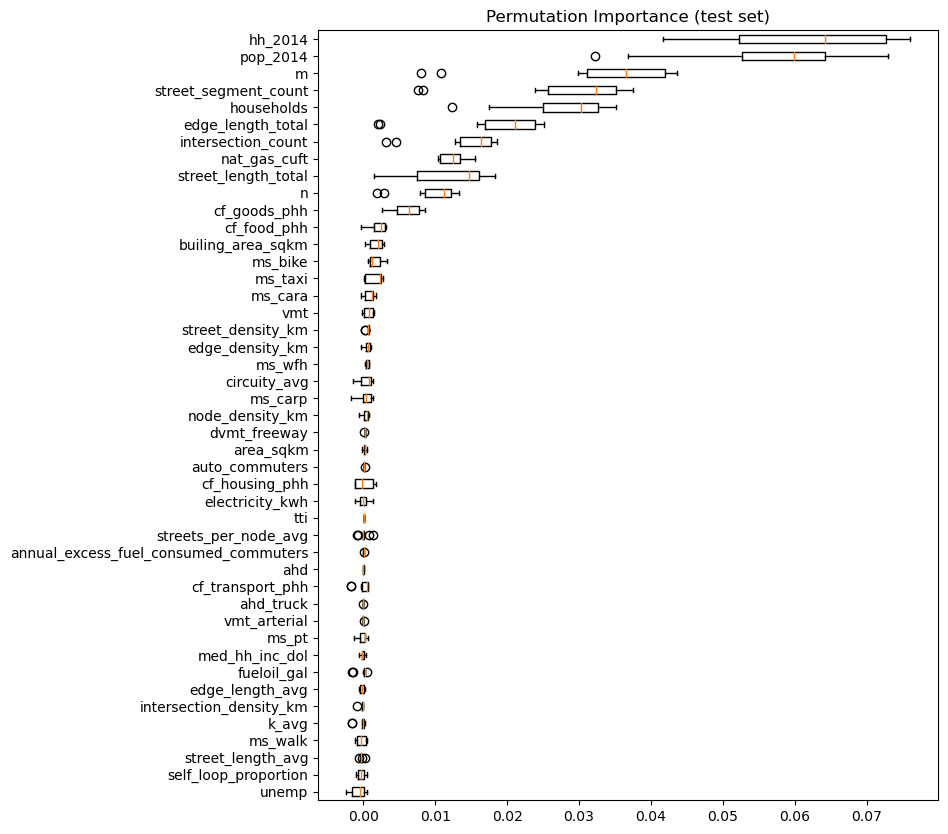

In [38]:
plt.figure(figsize=(8,10))
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],)

plt.title("Permutation Importance (test set)")